The used dataset can be found on kaggle: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [28]:
dataset = pd.read_csv('/content/drive/MyDrive/ML datasets/Mall_Customers.csv')

In [29]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
dataset.shape

(200, 5)

In [31]:
print("Our dataset contains %s row" % dataset.shape[0])

Our dataset contains 200 row


In [32]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [33]:
print("We have no empty cells")

We have no empty cells


In [64]:
annual_income_label = 'Annual Income (k$)'
spending_score_label = 'Spending Score (1-100)'
X = dataset.loc[:, [annual_income_label, spending_score_label]].values

**Calculating the number of clusters (WCSS)**

In [39]:
wcss = []
clusters_range = range(1, 10)
for i in clusters_range:
  kmeans_cluster = KMeans(n_clusters=i, random_state=10)
  kmeans_cluster.fit(X)
  wcss.append(kmeans_cluster.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

inertia_: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

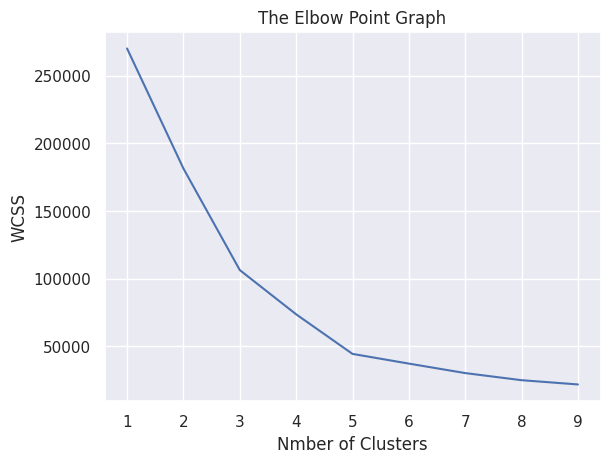

In [40]:
plt.plot(clusters_range, wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Nmber of Clusters')
plt.ylabel('WCSS')
plt.xticks(clusters_range, clusters_range)
plt.show()

In [41]:
print("According to the graph, the optimum number of clusters is 5")

According to the graph, the optimum number of clusters is 5


In [46]:
kmeans_cluster = KMeans(n_clusters=5, random_state=20)
kmeans_cluster.fit(X)
Y = kmeans_cluster.predict(X)
Y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

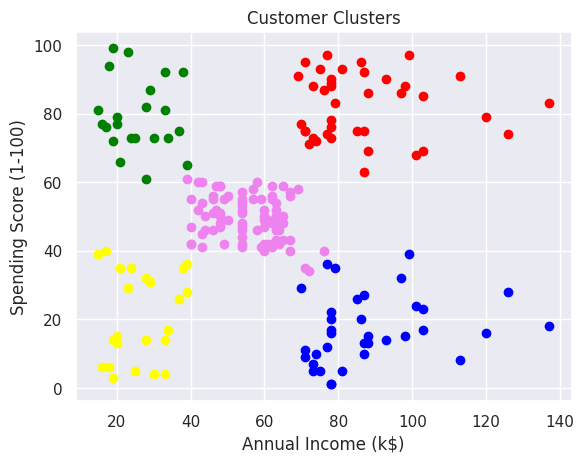

In [65]:
plt.scatter(X[Y==0, 0], X[Y==0, 1], c='blue', label='Cluster 1')
plt.scatter(X[Y==1, 0], X[Y==1, 1], c='red', label='Cluster 2')
plt.scatter(X[Y==2, 0], X[Y==2, 1], c='violet', label='Cluster 3')
plt.scatter(X[Y==3, 0], X[Y==3, 1], c='yellow', label='Cluster 4')
plt.scatter(X[Y==4, 0], X[Y==4, 1], c='green', label='Cluster 5')

plt.title("Customer Clusters")
plt.xlabel(annual_income_label)
plt.ylabel(spending_score_label)

plt.show()